In [1]:
import math
from tqdm import tqdm
import torch
from torch import Tensor, nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import CosineAnnealingLR

from typing import Union, Tuple, List, Optional, Callable, Any
from torchvision import datasets, transforms, utils
from torch.utils.data import DataLoader

import sys
from pathlib import Path
# Go up one level from training_scripts/ to the project root
project_root = Path().resolve().parent
sys.path.append(str(project_root))

%load_ext autoreload
%autoreload 2

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

import torch
import random
import torch.backends.cudnn as cudnn

torch.manual_seed(42)
torch.cuda.manual_seed(42)
torch.cuda.manual_seed_all(42)
np.random.seed(42)
cudnn.benchmark = False
cudnn.deterministic = True
random.seed(42)

Using device: cuda


## Dataset

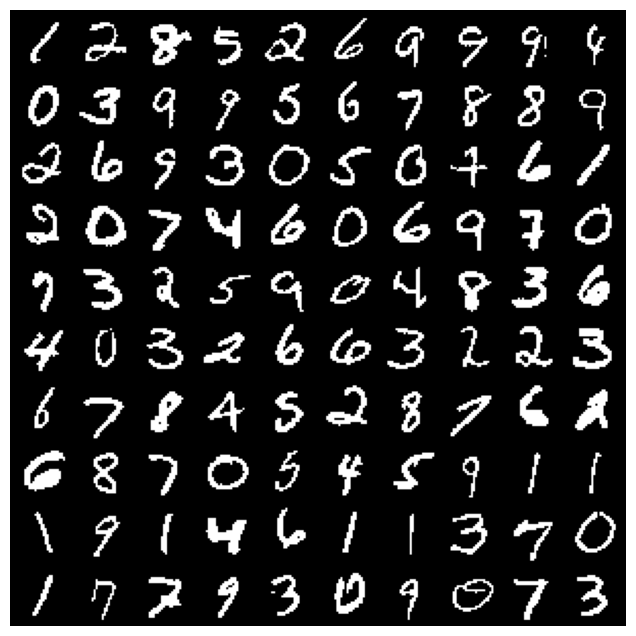

In [2]:
from datasets.binarized_mnist import build_dataloaders
train_loader, test_loader = build_dataloaders(batch_size=100)

# Visualize samples
images, labels = next(iter(train_loader))

# Make a grid of images
grid = utils.make_grid(images, nrow=10, padding=2)

# Plot the grid
plt.figure(figsize=(8,8))
plt.imshow(grid.permute(1, 2, 0).squeeze(), cmap="gray")
plt.axis('off')
plt.show()

In [3]:
from models.discrete_diffusion.udm import UniformDiffusion
from models.denoising_models.mlp import MLP
from models.denoising_models.unet_with_attention import UNetWithAttention

batch_size = 64
epochs = 100
vocab_size = 2
num_categories = vocab_size
input_shape = (1, 28, 28)
num_timesteps = 1000
lr = 1e-4

model = UniformDiffusion(
    denoising_model=UNetWithAttention(
        num_categories=num_categories,
        embedding_dim=64,
        ch_mult=(2, 4, 8),
        num_res_blocks=2,
        attention_resolutions=(1, 2),
        encode_time=True,
    ),
    num_categories=num_categories,
    input_shape=input_shape,
    noise_schedule="linear",
    num_timesteps=num_timesteps,
    discretization_schedule="linear",
).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=lr)
scheduler = CosineAnnealingLR(optimizer, T_max=epochs, eta_min=lr * 0.01)

In [4]:
# model.load_state_dict(torch.load('../model_weights/udm_binarized_mnist_256.pth'))

Epoch 1/100, Loss (train): 78.1431, Loss (test): 79.6386, LR: 0.00009998


Epoch 2/100, Loss (train): 75.4589, Loss (test): 68.7707, LR: 0.00009990


Epoch 3/100, Loss (train): 68.2471, Loss (test): 64.9416, LR: 0.00009978


Epoch 4/100, Loss (train): 66.2280, Loss (test): 65.4110, LR: 0.00009961


Epoch 5/100, Loss (train): 63.2495, Loss (test): 61.8389, LR: 0.00009939


Epoch 6/100, Loss (train): 62.1866, Loss (test): 62.0290, LR: 0.00009912


Epoch 7/100, Loss (train): 61.9459, Loss (test): 61.5329, LR: 0.00009881


Epoch 8/100, Loss (train): 61.5110, Loss (test): 61.9789, LR: 0.00009844


Epoch 9/100, Loss (train): 60.3443, Loss (test): 60.8247, LR: 0.00009803


Epoch 10/100, Loss (train): 59.8837, Loss (test): 59.8406, LR: 0.00009758


Epoch 11/100, Loss (train): 59.9627, Loss (test): 61.8971, LR: 0.00009707


Epoch 12/100, Loss (train): 59.7818, Loss (test): 59.6356, LR: 0.00009652


Epoch 13/100, Loss (train): 59.2474, Loss (test): 58.5159, LR: 0.00009593


Epoch 14/100, Loss (train): 59.3728, Loss (test): 58.8406, LR: 0.00009529


Epoch 15/100, Loss (train): 60.1941, Loss (test): 57.6212, LR: 0.00009460


Epoch 16/100, Loss (train): 58.7532, Loss (test): 59.1112, LR: 0.00009388


Epoch 17/100, Loss (train): 59.2989, Loss (test): 60.2008, LR: 0.00009311


Epoch 18/100, Loss (train): 59.3661, Loss (test): 58.6439, LR: 0.00009229


Epoch 19/100, Loss (train): 59.1392, Loss (test): 60.4649, LR: 0.00009144


Epoch 20/100, Loss (train): 58.3962, Loss (test): 63.1227, LR: 0.00009055


Epoch 21/100, Loss (train): 63.8210, Loss (test): 59.9340, LR: 0.00008961


Epoch 22/100, Loss (train): 58.3929, Loss (test): 57.5816, LR: 0.00008864


Epoch 23/100, Loss (train): 57.7182, Loss (test): 57.0878, LR: 0.00008763


Epoch 24/100, Loss (train): 59.4539, Loss (test): 57.1498, LR: 0.00008658


Epoch 25/100, Loss (train): 57.6497, Loss (test): 56.6450, LR: 0.00008550


Epoch 26/100, Loss (train): 57.5805, Loss (test): 59.6858, LR: 0.00008439


Epoch 27/100, Loss (train): 58.4497, Loss (test): 57.7701, LR: 0.00008323


Epoch 28/100, Loss (train): 58.3194, Loss (test): 60.7180, LR: 0.00008205


Epoch 29/100, Loss (train): 57.4322, Loss (test): 57.2231, LR: 0.00008084


Epoch 30/100, Loss (train): 57.2716, Loss (test): 59.7165, LR: 0.00007960


Epoch 31/100, Loss (train): 57.9101, Loss (test): 56.8793, LR: 0.00007832


Epoch 32/100, Loss (train): 57.8308, Loss (test): 60.0387, LR: 0.00007702


Epoch 33/100, Loss (train): 57.4872, Loss (test): 56.4949, LR: 0.00007570


Epoch 34/100, Loss (train): 58.6756, Loss (test): 56.6133, LR: 0.00007435


Epoch 35/100, Loss (train): 57.0208, Loss (test): 57.4531, LR: 0.00007297


Epoch 36/100, Loss (train): 56.9693, Loss (test): 56.3821, LR: 0.00007158


Epoch 37/100, Loss (train): 57.0091, Loss (test): 58.6538, LR: 0.00007016


Epoch 38/100, Loss (train): 57.0535, Loss (test): 56.0460, LR: 0.00006872


Epoch 39/100, Loss (train): 57.5385, Loss (test): 57.2830, LR: 0.00006727


Epoch 40/100, Loss (train): 58.3521, Loss (test): 59.1680, LR: 0.00006580


Epoch 41/100, Loss (train): 56.5617, Loss (test): 57.0120, LR: 0.00006431


Epoch 42/100, Loss (train): 56.3560, Loss (test): 57.7847, LR: 0.00006281


Epoch 43/100, Loss (train): 56.0953, Loss (test): 57.6440, LR: 0.00006130


Epoch 44/100, Loss (train): 56.2848, Loss (test): 56.1697, LR: 0.00005978


Epoch 45/100, Loss (train): 56.1719, Loss (test): 57.1997, LR: 0.00005824


Epoch 46/100, Loss (train): 55.8167, Loss (test): 57.1484, LR: 0.00005670


Epoch 47/100, Loss (train): 56.5183, Loss (test): 56.6917, LR: 0.00005516


Epoch 48/100, Loss (train): 56.8554, Loss (test): 55.8640, LR: 0.00005361


Epoch 49/100, Loss (train): 55.8962, Loss (test): 54.9870, LR: 0.00005205


Epoch 50/100, Loss (train): 55.8440, Loss (test): 55.9211, LR: 0.00005050


Epoch 51/100, Loss (train): 57.7395, Loss (test): 58.7480, LR: 0.00004895


Epoch 52/100, Loss (train): 56.2549, Loss (test): 58.8126, LR: 0.00004739


Epoch 53/100, Loss (train): 55.8156, Loss (test): 57.0859, LR: 0.00004584


Epoch 54/100, Loss (train): 55.5214, Loss (test): 55.7222, LR: 0.00004430


Epoch 55/100, Loss (train): 55.6033, Loss (test): 55.0374, LR: 0.00004276


Epoch 56/100, Loss (train): 55.2100, Loss (test): 54.9270, LR: 0.00004122


Epoch 57/100, Loss (train): 56.1842, Loss (test): 60.1167, LR: 0.00003970


Epoch 58/100, Loss (train): 55.0207, Loss (test): 56.0341, LR: 0.00003819


Epoch 59/100, Loss (train): 55.2371, Loss (test): 98.3735, LR: 0.00003669


Epoch 60/100, Loss (train): 55.1887, Loss (test): 56.2239, LR: 0.00003520


Epoch 61/100, Loss (train): 55.3067, Loss (test): 55.0041, LR: 0.00003373


Epoch 62/100, Loss (train): 55.8488, Loss (test): 57.4857, LR: 0.00003228


Epoch 63/100, Loss (train): 55.2957, Loss (test): 54.6663, LR: 0.00003084


Epoch 64/100, Loss (train): 55.2850, Loss (test): 55.5449, LR: 0.00002942


Epoch 65/100, Loss (train): 55.3534, Loss (test): 54.4241, LR: 0.00002803


Epoch 66/100, Loss (train): 56.3774, Loss (test): 54.6718, LR: 0.00002665


Epoch 67/100, Loss (train): 55.0237, Loss (test): 54.8676, LR: 0.00002530


Epoch 68/100, Loss (train): 56.6062, Loss (test): 54.0139, LR: 0.00002398


Epoch 69/100, Loss (train): 54.9510, Loss (test): 54.0791, LR: 0.00002268


Epoch 70/100, Loss (train): 54.5117, Loss (test): 54.6673, LR: 0.00002140


Epoch 71/100, Loss (train): 55.1502, Loss (test): 55.3407, LR: 0.00002016


Epoch 72/100, Loss (train): 54.6231, Loss (test): 55.4914, LR: 0.00001895


Epoch 73/100, Loss (train): 54.4348, Loss (test): 55.1068, LR: 0.00001777


Epoch 74/100, Loss (train): 54.6741, Loss (test): 54.2514, LR: 0.00001661


Epoch 75/100, Loss (train): 54.4684, Loss (test): 54.0802, LR: 0.00001550


Epoch 76/100, Loss (train): 54.4862, Loss (test): 54.4289, LR: 0.00001442


Epoch 77/100, Loss (train): 54.3123, Loss (test): 54.9553, LR: 0.00001337


Epoch 78/100, Loss (train): 54.0227, Loss (test): 54.1320, LR: 0.00001236


Epoch 79/100, Loss (train): 54.6957, Loss (test): 54.0598, LR: 0.00001139


Epoch 80/100, Loss (train): 54.0777, Loss (test): 54.6225, LR: 0.00001045


Epoch 81/100, Loss (train): 54.2700, Loss (test): 56.8227, LR: 0.00000956


Epoch 82/100, Loss (train): 54.4588, Loss (test): 54.5167, LR: 0.00000871


Epoch 83/100, Loss (train): 54.0813, Loss (test): 53.6983, LR: 0.00000789


Epoch 84/100, Loss (train): 53.6835, Loss (test): 55.0146, LR: 0.00000712


Epoch 85/100, Loss (train): 55.0190, Loss (test): 54.1740, LR: 0.00000640


Epoch 86/100, Loss (train): 54.3292, Loss (test): 54.3224, LR: 0.00000571


Epoch 87/100, Loss (train): 54.6651, Loss (test): 54.6910, LR: 0.00000507


Epoch 88/100, Loss (train): 53.8520, Loss (test): 55.0055, LR: 0.00000448


Epoch 89/100, Loss (train): 53.8406, Loss (test): 54.9340, LR: 0.00000393


Epoch 90/100, Loss (train): 53.9692, Loss (test): 54.5839, LR: 0.00000342


Epoch 91/100, Loss (train): 54.0193, Loss (test): 54.2580, LR: 0.00000297


Epoch 92/100, Loss (train): 54.0009, Loss (test): 55.1871, LR: 0.00000256


Epoch 93/100, Loss (train): 54.0320, Loss (test): 54.5539, LR: 0.00000219


Epoch 94/100, Loss (train): 53.7241, Loss (test): 55.0207, LR: 0.00000188


Epoch 95/100, Loss (train): 53.8918, Loss (test): 54.6136, LR: 0.00000161


Epoch 96/100, Loss (train): 53.9274, Loss (test): 54.7384, LR: 0.00000139


Epoch 97/100, Loss (train): 54.4313, Loss (test): 53.4940, LR: 0.00000122


Epoch 98/100, Loss (train): 53.6251, Loss (test): 54.0795, LR: 0.00000110


Epoch 99/100, Loss (train): 53.6725, Loss (test): 53.2189, LR: 0.00000102


Epoch 100/100, Loss (train): 53.4714, Loss (test): 55.4463, LR: 0.00000100


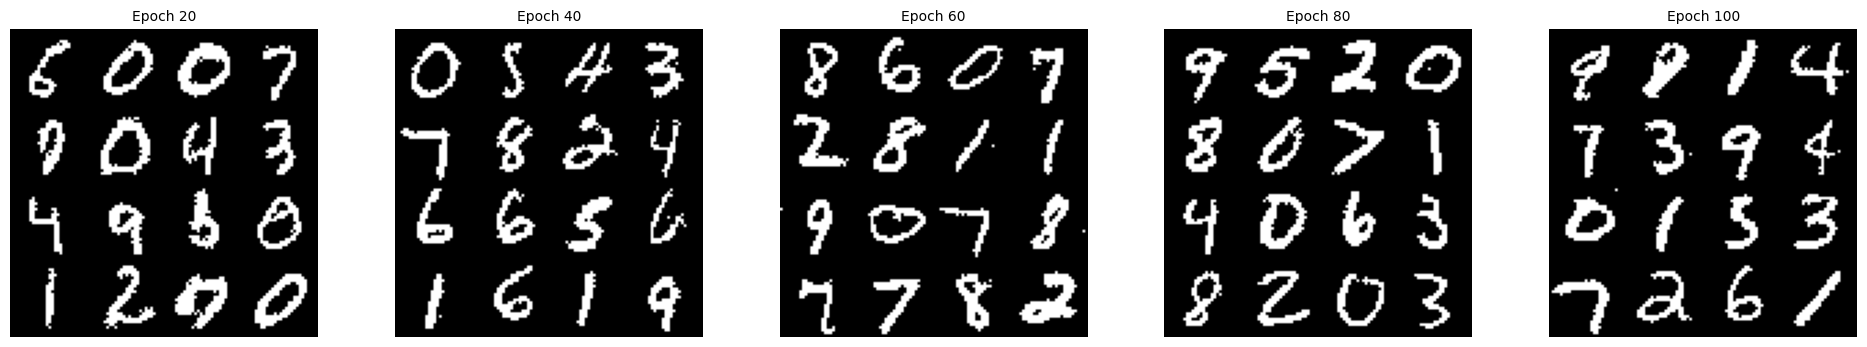

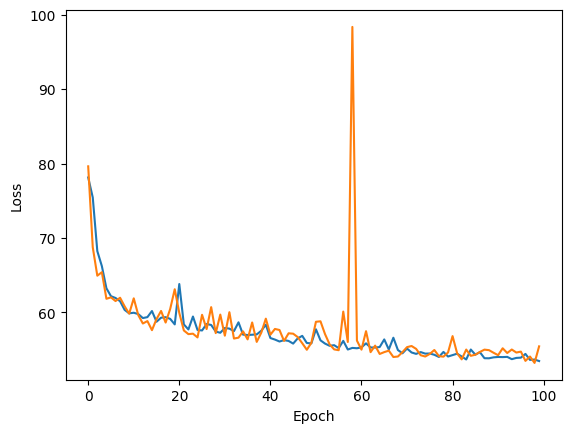

In [5]:
train_loader, test_loader = build_dataloaders(batch_size=batch_size)

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(24, 4))
fig_idx = 0

train_losses = []
test_losses = []

for epoch in range(epochs):
    model.train()
    train_loss = 0
    for x, labels in train_loader:
        x = x.long().to(device)
        optimizer.zero_grad()
        loss = model(x)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
        
    scheduler.step()
    
    model.eval()
    with torch.no_grad():
        test_loss = 0
        for x, labels in test_loader:
            x = x.long().to(device)
            loss = model(x)
            test_loss += loss.item()
        test_loss /= len(test_loader)
        test_losses.append(test_loss)
    
    print(f"Epoch {epoch + 1}/{epochs}, Loss (train): {train_loss:.4f}, Loss (test): {test_loss:.4f}, LR: {optimizer.param_groups[0]['lr']:.8f}")
        
    if (epoch + 1) % (epochs // 5) == 0:
        with torch.no_grad():
            samples = model.sample(num_samples=16, device=device).float().cpu()
        grid = utils.make_grid(samples, nrow=4, padding=0)
        ax[fig_idx].imshow(grid.permute(1, 2, 0).squeeze().cpu().numpy(), cmap="gray")
        ax[fig_idx].set_title(f"Epoch {epoch + 1}", fontsize=10)
        ax[fig_idx].axis('off')
        fig_idx += 1
        
plt.show()

plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

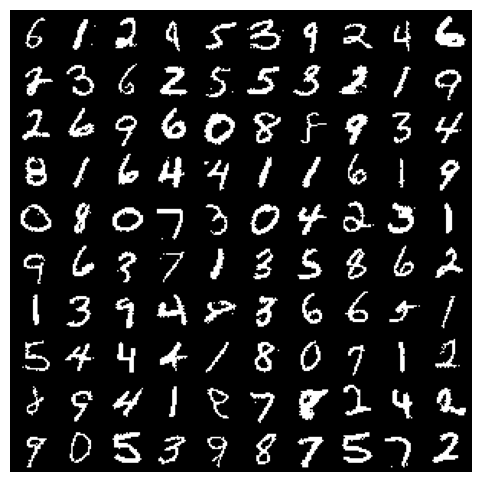

In [6]:
# Visualize samples
model.eval()
with torch.no_grad():
    samples = model.sample(num_samples=100, device=device).float().cpu()
grid = utils.make_grid(samples, nrow=10, padding=2)
plt.figure(figsize=(6,6))
plt.imshow(grid.permute(1, 2, 0).squeeze().cpu().numpy(), cmap="gray")
plt.axis('off')
plt.show()

In [7]:
# store model weights
torch.save(model.state_dict(), '../model_weights/udm_binarized_mnist_256.pth')